In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/Advertising.csv")

In [ ]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [ ]:
df.shape

(200, 5)

In [ ]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

There is No null value

In [ ]:
df.dtypes

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object

In [ ]:
df.info

<bound method DataFrame.info of      Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>

In [ ]:
df.describe

<bound method NDFrame.describe of      Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>

In [ ]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df.duplicated().any().sum()

0

There is No duplicate value.

In [ ]:
df.groupby(['TV','Radio','Newspaper','Sales']).size().reset_index()

,TV,Radio,Newspaper,Sales,0
0,0.7,39.6,8.7,1.6,1
1,4.1,11.6,5.7,3.2,1
2,5.4,29.9,9.4,5.3,1
3,7.3,28.1,41.4,5.5,1
4,7.8,38.9,50.6,6.6,1
...,...,...,...,...,...
195,289.7,42.3,51.2,25.4,1
196,290.7,4.1,8.5,12.8,1
197,292.9,28.3,43.2,21.4,1
198,293.6,27.7,1.8,20.7,1


## **Visualization**

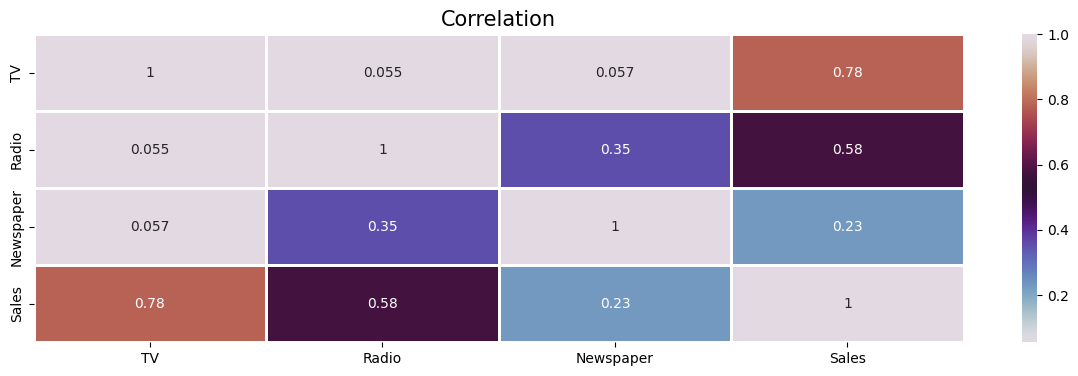

In [ ]:
sns.heatmap(df.corr(),annot=True,linewidth=1,cmap='twilight')
plt.title('Correlation',fontsize=15)
plt.show()

Numerical Variable Distribution

<Axes: xlabel='Sales', ylabel='Density'>

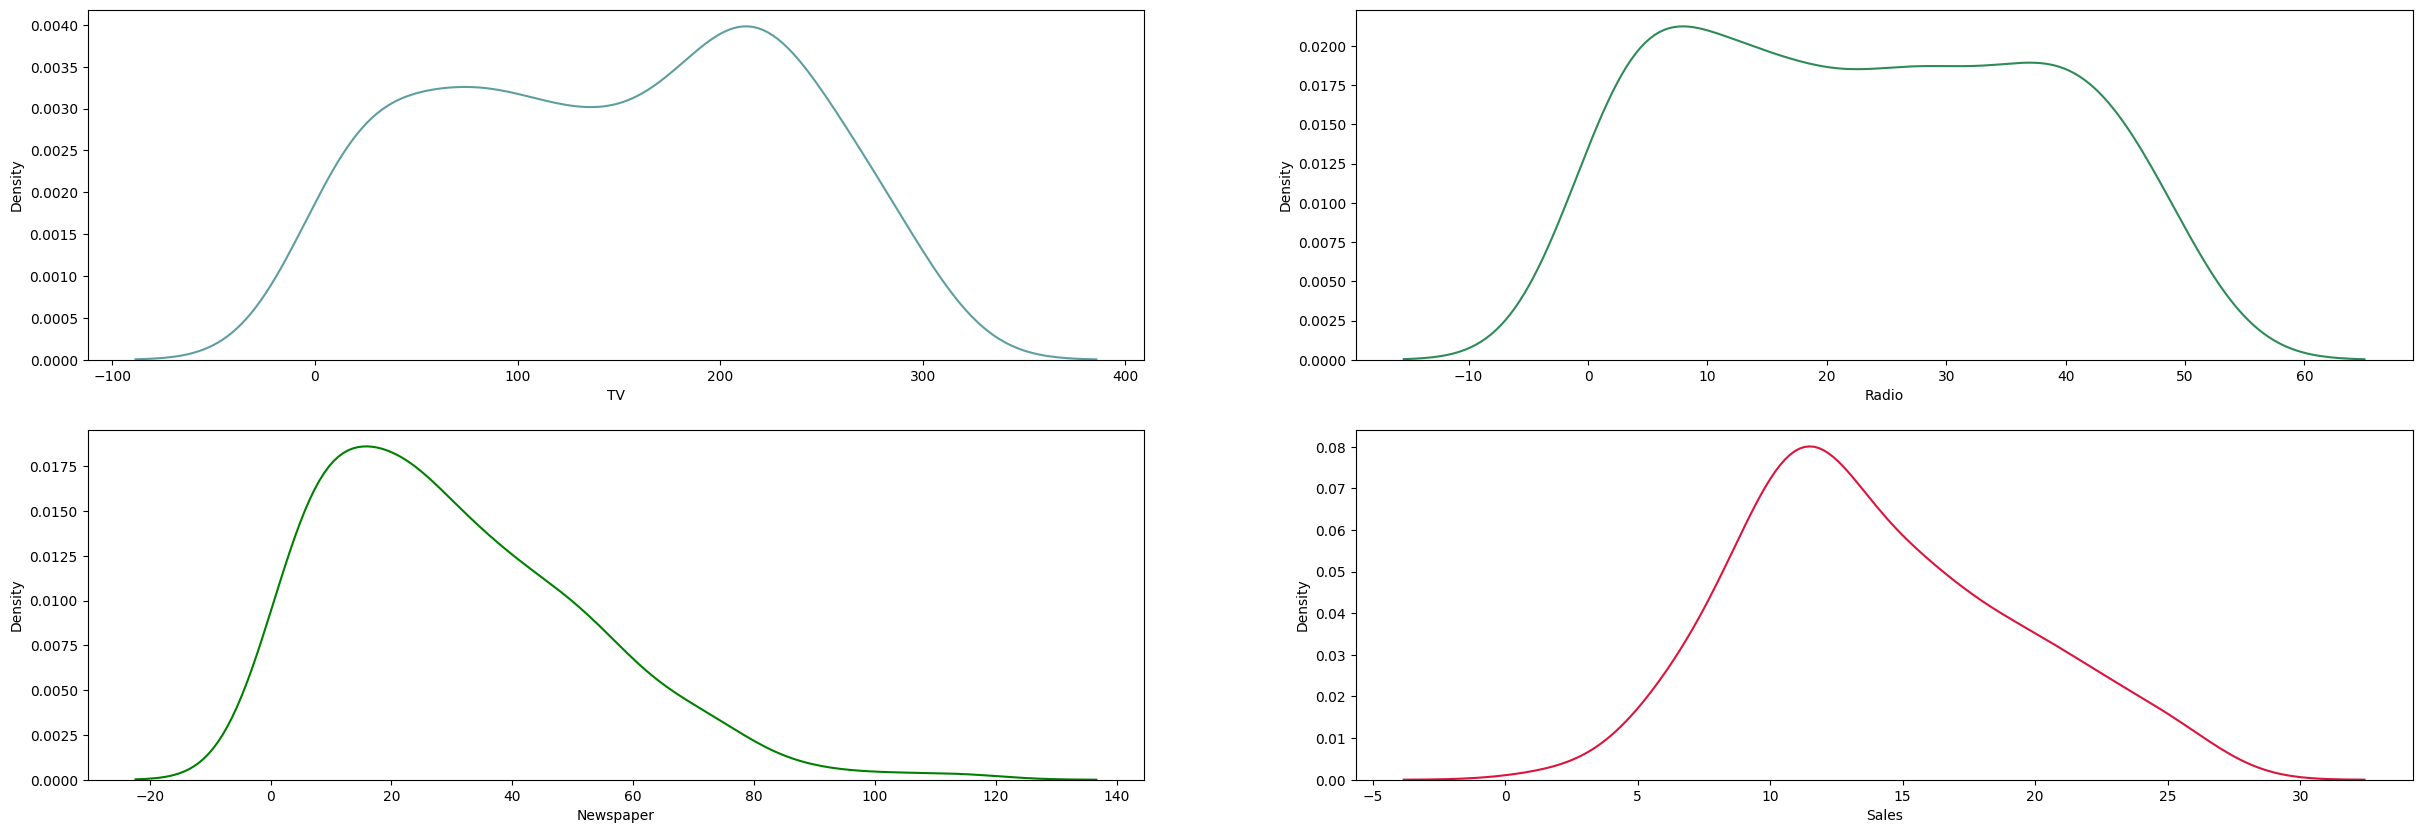

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(30, 10))
sns.kdeplot(x = 'TV', data = df, color='cadetblue', ax = ax[0,0])
sns.kdeplot(x = 'Radio', data = df,color='seagreen', ax = ax[0,1])
sns.kdeplot(x = 'Newspaper', data = df, color='green',ax = ax[1,0])
sns.kdeplot(x = 'Sales', data = df, color='crimson',ax = ax[1,1])


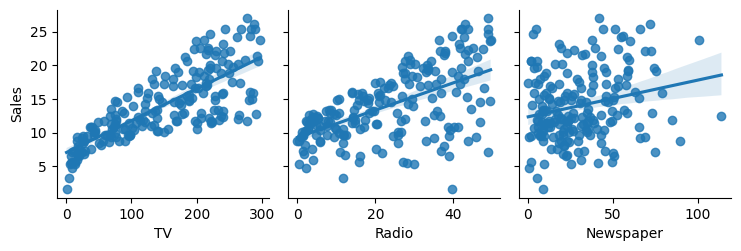

In [ ]:
sns.pairplot(df, x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales", kind="reg")

Outliers

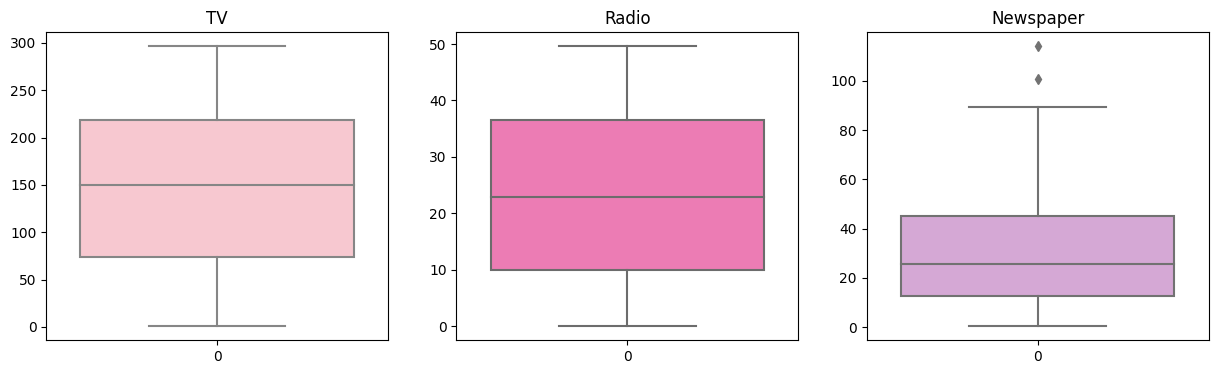

In [ ]:
plt.rcParams['figure.figsize']=(15,4)

plt.subplot(1,3,1)
sns.boxplot(df['TV'],color='pink')
plt.title('TV')

plt.subplot(1,3,2)
sns.boxplot(df['Radio'],color='hotpink')
plt.title('Radio')

plt.subplot(1,3,3)
sns.boxplot(df['Newspaper'],color='plum')
plt.title('Newspaper')

plt.show()

TV and Radio doesn't have outlier,only newspaper have some outlier.

In [ ]:
#Remove outlier from Newspaper
from scipy import stats

z_scores = stats.zscore(df['Newspaper'])
df= df[(z_scores < 3)]


In [ ]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


## **Seperate data into dependent and independent variable**

In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [ ]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 198, dtype: float64

## **Split the data into Training and Testing**

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=43)

print("Shape of X_train", X_train.shape)
print("Shape of y_train", y_train.shape)

Shape of X_train (138, 3)
Shape of y_train (138,)


## **Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
Sc=StandardScaler()
X_train=Sc.fit_transform(X_train)

X_test=Sc.fit_transform(X_test)

## **Models**

## **Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics

lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)


In [ ]:
MAE = metrics.mean_absolute_error(y_test, y_pred)
print("Linear Regression MAE:{}".format(MAE))

MSE = metrics.mean_squared_error(y_test, y_pred)
print('Linear Regression MSE: {}'.format(np.sqrt(MSE)))

R2 = metrics.r2_score(y_test, y_pred)
print("R2 Score:{}".format(R2))

Linear Regression MAE:1.5144088065875323
Linear Regression MSE: 2.158351121117523
R2 Score:0.8379837109346707


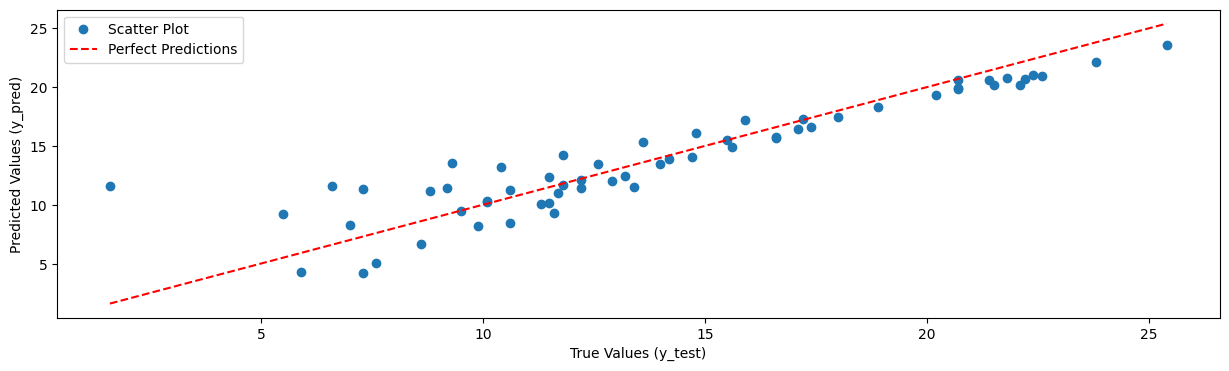

In [ ]:
plt.scatter(y_test, y_pred,label='Scatter Plot')
# Add a diagonal line for perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Predictions')

# Label the axes and add a legend
plt.xlabel('True Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.legend()

# Show the plot
plt.show()

##**Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

reg= RandomForestRegressor()
reg.fit(X_train,y_train)

# Make predictions
y_Pred_reg = reg.predict(X_test)


In [ ]:
MAE = metrics.mean_absolute_error(y_test, y_Pred_reg)
print("Random Forest Regression MAE:{}".format(MAE))

MSE = metrics.mean_squared_error(y_test, y_Pred_reg)
print('Random Forest Regression MAE: {}'.format(np.sqrt(MSE)))

R2 = metrics.r2_score(y_test, y_Pred_reg)

print("R2 Score:{}".format(R2))


Random Forest Regression MAE:1.1350333333333305
Random Forest Regression MAE: 1.5551720697937772
R2 Score:0.9158854004043616


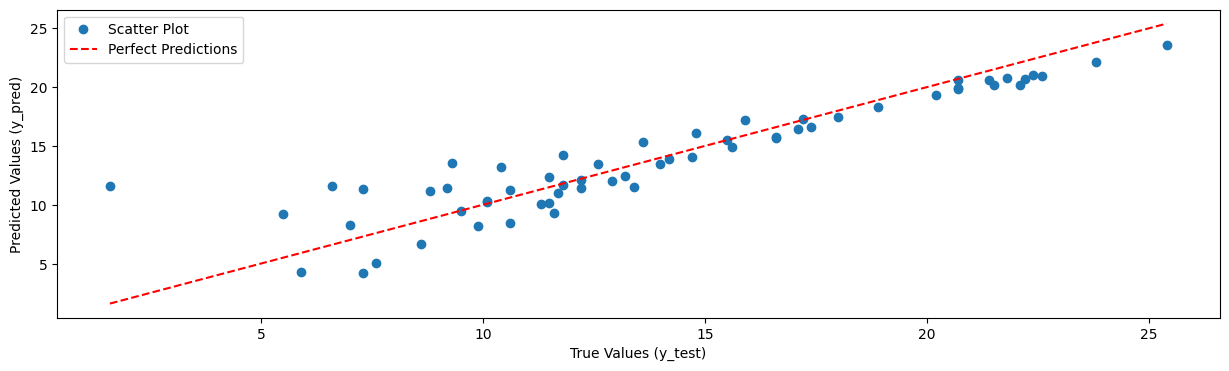

In [ ]:
plt.scatter(y_test, y_pred,label='Scatter Plot')
# Add a diagonal line for perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Predictions')

# Label the axes and add a legend
plt.xlabel('True Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.legend()

# Show the plot
plt.show()

## **K-Nearest Neighbors Regression (KNN)**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn= KNeighborsRegressor()
knn.fit(X_train,y_train)

# Make predictions
y_Pred_knn= knn.predict(X_test)


In [ ]:
MAE = metrics.mean_absolute_error(y_test, y_Pred_knn)
print("K-Nearest Neighbors Regression MAE:{}".format(MAE))

MSE = metrics.mean_squared_error(y_test, y_Pred_knn)
print('K-Nearest Neighbors Regression MSE: {}'.format(np.sqrt(MSE)))

R2 = metrics.r2_score(y_test, y_Pred_knn)

print("R2 Score:{}".format(R2))

K-Nearest Neighbors Regression MAE:1.328333333333333
K-Nearest Neighbors Regression MSE: 2.0207110959593737
R2 Score:0.8579886883913032


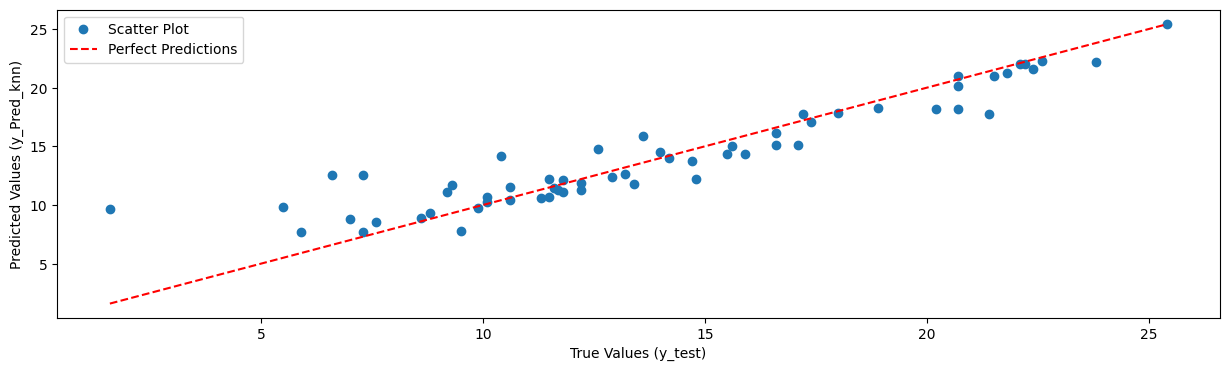

In [ ]:
plt.scatter(y_test, y_Pred_knn,label='Scatter Plot')
# Add a diagonal line for perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Predictions')

# Label the axes and add a legend
plt.xlabel('True Values (y_test)')
plt.ylabel('Predicted Values (y_Pred_knn)')
plt.legend()

# Show the plot
plt.show()

## **Bagging (Bootstrap Aggregating) with Decision Trees**

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Create a Bagging Regressor with Decision Trees as base estimators
base_estimator = DecisionTreeRegressor()
bagging_model = BaggingRegressor(estimator=base_estimator, n_estimators=100, random_state=42)

# Fit the Bagging model to the training data
bagging_model.fit(X_train, y_train)

# Make predictions
y_pred_bagging = bagging_model.predict(X_test)


In [ ]:
MAE = metrics.mean_absolute_error(y_test, y_pred_bagging)
print("Bagging Regression MAE:{}".format(MAE))

MSE = metrics.mean_squared_error(y_test, y_Pred_knn)
print('Bagging Regression MSE: {}'.format(np.sqrt(MSE)))

R2 = metrics.r2_score(y_test, y_pred_bagging)

print("R2 Score:{}".format(R2))


Bagging Regression MAE:1.1331999999999964
Bagging Regression MSE: 2.0207110959593737
R2 Score:0.9171985258429609


## **Stacking (Meta-Estimator)**

In [ ]:

from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


# Create a Stacking Regressor with multiple base models
base_models = [
    ('RandomForest', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('SVR', SVR(kernel='linear')),
]

stacking_model = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())

# Fit the Stacking model to the training data
stacking_model.fit(X_train, y_train)

# Make predictions
y_pred_stack = stacking_model.predict(X_test)


In [ ]:
MAE = metrics.mean_absolute_error(y_test, y_pred_stack)
print(" Stacking Regression MAE:{}".format(MAE))

MSE = metrics.mean_squared_error(y_test, y_Pred_knn)
print(' Stacking Regression MSE: {}'.format(np.sqrt(MSE)))

R2 = metrics.r2_score(y_test, y_pred_stack)

print("R2 Score:{}".format(R2))


 Stacking Regression MAE:0.9986872405016236
 Stacking Regression MSE: 2.0207110959593737
R2 Score:0.9255008168564168


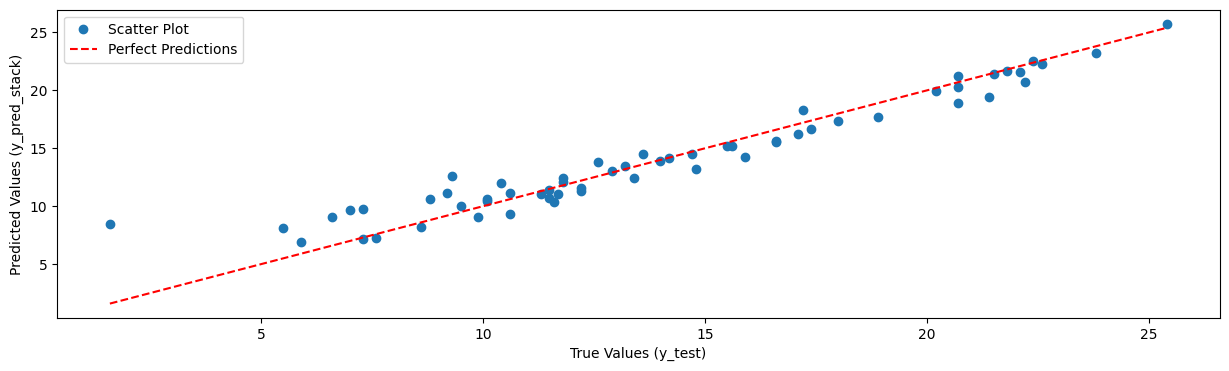

In [ ]:
plt.scatter(y_test, y_pred_stack,label='Scatter Plot')
# Add a diagonal line for perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Predictions')

# Label the axes and add a legend
plt.xlabel('True Values (y_test)')
plt.ylabel('Predicted Values (y_pred_stack)')
plt.legend()

# Show the plot
plt.show()

## **Stacking produced the highest R-squared (R2) score of 92% among the models we tested**

In [ ]:
import pickle

filename="SALES PREDICTION.sav"
pickle.dump(stacking_model,open(filename,'wb'))

In [ ]:
import joblib

# Save the scaler object to a file
joblib.dump(Sc, 'scaler.pkl')

['scaler.pkl']

In [ ]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [ ]:
df.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')>

In [ ]:
# Make predictions on new data
new_data = pd.DataFrame({
    'TV': [230.1],
    'Radio': [37.8],
    'Newspaper': [69.2]
  })


# Apply the same preprocessing (standardization) to new data
new_data_scaled = Sc.transform(new_data)

# Make predictions on the standardized new data
predicted_sales = stacking_model.predict(new_data_scaled)

# Display the predicted sales
print(f'Predicted Sales: {predicted_sales[0]}')

Predicted Sales: 21.560652188932266
